<a href="https://colab.research.google.com/github/Blackcurrant06/Big-Data---Assignment/blob/main/BIG_DATA_Amazon_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import kagglehub

path = kagglehub.dataset_download("ikramshah512/amazon-products-sales-dataset-42k-items-2025")

print("Path to dataset files:", path)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Using Colab cache for faster access to the 'amazon-products-sales-dataset-42k-items-2025' dataset.
Path to dataset files: /kaggle/input/amazon-products-sales-dataset-42k-items-2025
/kaggle/input/amazon-products-sales-dataset-42k-items-2025/amazon_products_sales_data_cleaned.csv
/kaggle/input/amazon-products-sales-dataset-42k-items-2025/amazon_products_sales_data_uncleaned.csv


In [ ]:
import pandas as pd

# Load the data from the CSV file into a pandas DataFrame
file_path = '/kaggle/input/amazon-products-sales-dataset-42k-items-2025/amazon_products_sales_data_cleaned.csv'  # Replace with the correct path if needed
try:
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully from '{file_path}'.")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Data loaded successfully from '/kaggle/input/amazon-products-sales-dataset-42k-items-2025/amazon_products_sales_data_cleaned.csv'.


# Data Gathering

### API 1

In [ ]:
import requests
import json
import csv
import os

SERPAPI_API_KEY = "d0ba9fed733226340e770ed942f54589b188a00acba0a2c11a8174e7f8f4c26a"

# 1. Tentukan DAFTAR kata kunci Anda
SEARCH_KEYWORDS = [
    "headphones", "wireless earbuds", "bluetooth speaker", "laptop",
    "gaming mouse", "mechanical keyboard", "smartwatch", "4k smart tv",
    "security camera", "power bank", "ssd internal"
]

PAGES_PER_KEYWORD = 20

print(f"Mulai mengambil data untuk {len(SEARCH_KEYWORDS)} kata kunci...")

csv_filename = "amazon_results_multiple_pages.csv"
file_exists = os.path.isfile(csv_filename)

with open(csv_filename, "a", newline="", encoding="utf-8") as csvfile:
    fieldnames = [
        "product_title", "product_rating", "total_reviews", "purchased_last_month",
        "discounted_price", "original_price", "is_best_seller", "has_coupon",
        "delivery_date", "sustainability_tags", "product_image_url", "product_page_url", "product_category"
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    if not file_exists:
        writer.writeheader()

    for keyword in SEARCH_KEYWORDS:

        print(f"\n--- Mengambil data untuk kata kunci: '{keyword}' ---")

        # 4. Buat LOOP DALAM untuk setiap halaman (hingga batas 20 halaman)
        for page_num in range(1, PAGES_PER_KEYWORD + 1):

            params = {
                "api_key": SERPAPI_API_KEY,
                "engine": "amazon",
                "k": keyword,             # Gunakan kata kunci dari loop luar
                "s": "relevanceblender",
                "page": page_num          # Gunakan nomor halaman dari loop dalam
            }

            print(f"  Mengambil halaman: {page_num}...")

            try:
                search = requests.get("https://serpapi.com/search", params=params)
                response = search.json()

                # Cek jika ada kesalahan API
                if "error" in response:
                    print(f"    Error API: {response['error']}. Melompati kata kunci ini.")
                    break

                organic_results = response.get("organic_results", [])

                # Jika tidak ada hasil lagi, hentikan loop halaman
                if not organic_results:
                    print(f"    Tidak ada hasil lagi di halaman {page_num}. Pindah ke kata kunci berikutnya.")
                    break


                for result in organic_results:

                    # (Logika ekstraksi Anda tetap sama)
                    badges = result.get("badges", [])
                    best_seller_badges = [b for b in badges if "Best Seller" in b]
                    best_seller = best_seller_badges[0] if best_seller_badges else "No Badge"
                    offers = result.get("offers", [])
                    disc = offers[0] if offers else "No Offers"
                    delivery = result.get("delivery", [])
                    deli = delivery[0] if delivery else None
                    sustain = result.get("sustainability_features", [])
                    badge_names = [b.get("name") for b in sustain if "name" in b]
                    coupon_text = result.get("coupon")

                    writer.writerow({
                        "product_title": result.get("title"),
                        "product_rating": result.get("rating"),
                        "total_reviews": result.get("reviews"),
                        "purchased_last_month": result.get("bought_last_month"),
                        "discounted_price": result.get("price"),
                        "original_price": result.get("old_price"),
                        "is_best_seller": best_seller,
                        "has_coupon": disc,
                        "delivery_date": deli,
                        "sustainability_tags": ", ".join(badge_names),
                        "product_image_url": result.get("thumbnail"),
                        "product_page_url": result.get("link"),
                        "product_category": keyword
                    })

            except Exception as e:
                print(f"    Terjadi kesalahan: {e}. Melompati halaman ini.")
                continue

print(f"\nSelesai! Data diekspor ke amazon_results_multiple_pages.csv")

Mulai mengambil data untuk 20 kata kunci...

--- Mengambil data untuk kata kunci: 'headphones' ---
  Mengambil halaman: 1...
  Mengambil halaman: 2...
  Mengambil halaman: 3...
  Mengambil halaman: 4...
  Mengambil halaman: 5...
  Mengambil halaman: 6...
  Mengambil halaman: 7...
  Mengambil halaman: 8...
  Mengambil halaman: 9...
  Mengambil halaman: 10...
  Mengambil halaman: 11...
  Mengambil halaman: 12...
  Mengambil halaman: 13...
  Mengambil halaman: 14...
  Mengambil halaman: 15...
  Mengambil halaman: 16...
  Mengambil halaman: 17...
  Mengambil halaman: 18...
  Mengambil halaman: 19...
  Mengambil halaman: 20...

--- Mengambil data untuk kata kunci: 'wireless earbuds' ---
  Mengambil halaman: 1...
  Mengambil halaman: 2...
  Mengambil halaman: 3...
  Mengambil halaman: 4...
  Mengambil halaman: 5...
  Mengambil halaman: 6...
  Mengambil halaman: 7...
  Mengambil halaman: 8...
  Mengambil halaman: 9...
  Mengambil halaman: 10...
  Mengambil halaman: 11...
  Mengambil halaman: 

### API 2

In [ ]:
import requests
import json
import csv
import os

SERPAPI_API_KEY = "89393f849bfd24d667f0ccc7749570029d820b76950e2469be95cd5a38c38e0c"

# 1. Tentukan DAFTAR kata kunci Anda
SEARCH_KEYWORDS = [
    "external hard drive",
    "graphics card", "motherboard", "cpu cooler", "webcam", "monitor",
    "gaming monitor", "soundbar", "projector", "controller"
]

PAGES_PER_KEYWORD = 20

print(f"Mulai mengambil data untuk {len(SEARCH_KEYWORDS)} kata kunci...")

csv_filename = "amazon_results_multiple_pages.csv"
file_exists = os.path.isfile(csv_filename)

with open(csv_filename, "a", newline="", encoding="utf-8") as csvfile:
    fieldnames = [
        "product_title", "product_rating", "total_reviews", "purchased_last_month",
        "discounted_price", "original_price", "is_best_seller", "has_coupon",
        "delivery_date", "sustainability_tags", "product_image_url", "product_page_url", "product_category"
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    if not file_exists:
        writer.writeheader()

    for keyword in SEARCH_KEYWORDS:

        print(f"\n--- Mengambil data untuk kata kunci: '{keyword}' ---")

        # 4. Buat LOOP DALAM untuk setiap halaman (hingga batas 20 halaman)
        for page_num in range(1, PAGES_PER_KEYWORD + 1):

            params = {
                "api_key": SERPAPI_API_KEY,
                "engine": "amazon",
                "k": keyword,             # Gunakan kata kunci dari loop luar
                "s": "relevanceblender",
                "page": page_num          # Gunakan nomor halaman dari loop dalam
            }

            print(f"  Mengambil halaman: {page_num}...")

            try:
                search = requests.get("https://serpapi.com/search", params=params)
                response = search.json()

                # Cek jika ada kesalahan API
                if "error" in response:
                    print(f"    Error API: {response['error']}. Melompati kata kunci ini.")
                    break

                organic_results = response.get("organic_results", [])

                # Jika tidak ada hasil lagi, hentikan loop halaman
                if not organic_results:
                    print(f"    Tidak ada hasil lagi di halaman {page_num}. Pindah ke kata kunci berikutnya.")
                    break


                for result in organic_results:

                    # (Logika ekstraksi Anda tetap sama)
                    badges = result.get("badges", [])
                    best_seller_badges = [b for b in badges if "Best Seller" in b]
                    best_seller = best_seller_badges[0] if best_seller_badges else "No Badge"
                    offers = result.get("offers", [])
                    disc = offers[0] if offers else "No Offers"
                    delivery = result.get("delivery", [])
                    deli = delivery[0] if delivery else None
                    sustain = result.get("sustainability_features", [])
                    badge_names = [b.get("name") for b in sustain if "name" in b]
                    coupon_text = result.get("coupon")

                    writer.writerow({
                        "product_title": result.get("title"),
                        "product_rating": result.get("rating"),
                        "total_reviews": result.get("reviews"),
                        "purchased_last_month": result.get("bought_last_month"),
                        "discounted_price": result.get("price"),
                        "original_price": result.get("old_price"),
                        "is_best_seller": best_seller,
                        "has_coupon": disc,
                        "delivery_date": deli,
                        "sustainability_tags": ", ".join(badge_names),
                        "product_image_url": result.get("thumbnail"),
                        "product_page_url": result.get("link"),
                        "product_category": keyword
                    })

            except Exception as e:
                print(f"    Terjadi kesalahan: {e}. Melompati halaman ini.")
                continue

print(f"\nSelesai! Data diekspor ke amazon_results_multiple_pages.csv")

Mulai mengambil data untuk 10 kata kunci...

--- Mengambil data untuk kata kunci: 'external hard drive' ---
  Mengambil halaman: 1...
  Mengambil halaman: 2...
  Mengambil halaman: 3...
  Mengambil halaman: 4...
  Mengambil halaman: 5...
  Mengambil halaman: 6...
  Mengambil halaman: 7...
  Mengambil halaman: 8...
  Mengambil halaman: 9...
  Mengambil halaman: 10...
  Mengambil halaman: 11...
  Mengambil halaman: 12...
  Mengambil halaman: 13...
  Mengambil halaman: 14...
  Mengambil halaman: 15...
  Mengambil halaman: 16...
  Mengambil halaman: 17...
  Mengambil halaman: 18...
  Mengambil halaman: 19...
  Mengambil halaman: 20...

--- Mengambil data untuk kata kunci: 'graphics card' ---
  Mengambil halaman: 1...
  Mengambil halaman: 2...
  Mengambil halaman: 3...
  Mengambil halaman: 4...
  Mengambil halaman: 5...
  Mengambil halaman: 6...
  Mengambil halaman: 7...
  Mengambil halaman: 8...
  Mengambil halaman: 9...
  Mengambil halaman: 10...
  Mengambil halaman: 11...
  Mengambil hal

### API 3

In [ ]:
import requests
import json
import csv
import os

SERPAPI_API_KEY = "7043bc1c2885772004d0328578c5b258ecf2f714f600d9677198d3577675a493"
SEARCH_KEYWORDS = [
    "Arduino", "smartbell", "smart watch", "Android Tablet", "USB Hub", "Thunderbolt Dock",
    "digital clock", "DAC", "Camera", "Robotic Vacuums", "headphone", "cooling pad",
    "vr", "power tools", "IEM"
]

PAGES_PER_KEYWORD = 20

print(f"Mulai mengambil data untuk {len(SEARCH_KEYWORDS)} kata kunci...")

csv_filename = "amazon_results_multiple_pages.csv"
file_exists = os.path.isfile(csv_filename)

with open(csv_filename, "a", newline="", encoding="utf-8") as csvfile:
    fieldnames = [
        "product_title", "product_rating", "total_reviews", "purchased_last_month",
        "discounted_price", "original_price", "is_best_seller", "has_coupon",
        "delivery_date", "sustainability_tags", "product_image_url", "product_page_url", "product_category"
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    if not file_exists:
        writer.writeheader()

    for keyword in SEARCH_KEYWORDS:

        print(f"\n--- Mengambil data untuk kata kunci: '{keyword}' ---")

        # 4. Buat LOOP DALAM untuk setiap halaman (hingga batas 20 halaman)
        for page_num in range(1, PAGES_PER_KEYWORD + 1):

            params = {
                "api_key": SERPAPI_API_KEY,
                "engine": "amazon",
                "k": keyword,             # Gunakan kata kunci dari loop luar
                "s": "relevanceblender",
                "page": page_num          # Gunakan nomor halaman dari loop dalam
            }

            print(f"  Mengambil halaman: {page_num}...")

            try:
                search = requests.get("https://serpapi.com/search", params=params)
                response = search.json()

                # Cek jika ada kesalahan API
                if "error" in response:
                    print(f"    Error API: {response['error']}. Melompati kata kunci ini.")
                    break

                organic_results = response.get("organic_results", [])

                # Jika tidak ada hasil lagi, hentikan loop halaman
                if not organic_results:
                    print(f"    Tidak ada hasil lagi di halaman {page_num}. Pindah ke kata kunci berikutnya.")
                    break


                for result in organic_results:

                    # (Logika ekstraksi Anda tetap sama)
                    badges = result.get("badges", [])
                    best_seller_badges = [b for b in badges if "Best Seller" in b]
                    best_seller = best_seller_badges[0] if best_seller_badges else "No Badge"
                    offers = result.get("offers", [])
                    disc = offers[0] if offers else "No Offers"
                    delivery = result.get("delivery", [])
                    deli = delivery[0] if delivery else None
                    sustain = result.get("sustainability_features", [])
                    badge_names = [b.get("name") for b in sustain if "name" in b]
                    coupon_text = result.get("coupon")

                    writer.writerow({
                        "product_title": result.get("title"),
                        "product_rating": result.get("rating"),
                        "total_reviews": result.get("reviews"),
                        "purchased_last_month": result.get("bought_last_month"),
                        "discounted_price": result.get("price"),
                        "original_price": result.get("old_price"),
                        "is_best_seller": best_seller,
                        "has_coupon": disc,
                        "delivery_date": deli,
                        "sustainability_tags": ", ".join(badge_names),
                        "product_image_url": result.get("thumbnail"),
                        "product_page_url": result.get("link"),
                        "product_category": keyword
                    })

            except Exception as e:
                print(f"    Terjadi kesalahan: {e}. Melompati halaman ini.")
                continue

print(f"\nSelesai! Data diekspor ke amazon_results_multiple_pages.csv")

Mulai mengambil data untuk 15 kata kunci...

--- Mengambil data untuk kata kunci: 'Arduino' ---
  Mengambil halaman: 1...
    Error API: Your account has run out of searches.. Melompati kata kunci ini.

--- Mengambil data untuk kata kunci: 'smartbell' ---
  Mengambil halaman: 1...
    Error API: Your account has run out of searches.. Melompati kata kunci ini.

--- Mengambil data untuk kata kunci: 'smart watch' ---
  Mengambil halaman: 1...
    Error API: Your account has run out of searches.. Melompati kata kunci ini.

--- Mengambil data untuk kata kunci: 'Android Tablet' ---
  Mengambil halaman: 1...
    Error API: Your account has run out of searches.. Melompati kata kunci ini.

--- Mengambil data untuk kata kunci: 'USB Hub' ---
  Mengambil halaman: 1...
    Error API: Your account has run out of searches.. Melompati kata kunci ini.

--- Mengambil data untuk kata kunci: 'Thunderbolt Dock' ---
  Mengambil halaman: 1...
    Error API: Your account has run out of searches.. Melompati ka

The following code cell will execute a Python script to merge the data from `amazon_results.csv` into `amazon_products_sales_data_cleaned.csv`. It will also convert the 'purchased_last_month' and price columns to numeric types, handling values like "10K+" and currency symbols.

# Database Update

### Format conversion

In [ ]:
import pandas as pd
import numpy as np

# Membaca file CSV
df = pd.read_csv('amazon_results_multiple_pages.csv')

# Fungsi untuk mengonversi purchased_last_month ke numerik
def convert_purchased(text):
    if pd.isna(text) or text == '':
        return np.nan

    text = str(text).strip()

    # Handle kasus "New on Amazon"
    if "New on Amazon" in text:
        return 0

    # Ekstrak angka dari string
    if 'K' in text:
        # Untuk format dengan K (contoh: 10K+)
        parts = text.split('K')
        number_part = parts[0].strip()
        if number_part.isdigit() or (number_part.replace('.', '').isdigit() and number_part.count('.') <= 1):
            return int(float(number_part) * 1000)
    elif '+' in text:
        # Untuk format tanpa K (contoh: 200+)
        parts = text.split('+')
        number_part = parts[0].strip()
        if number_part.isdigit():
            return int(number_part)

    # Jika tidak ada format yang dikenali, coba ekstrak angka saja
    try:
        # Cari semua digit dalam string
        import re
        numbers = re.findall(r'\d+', text)
        if numbers:
            return int(numbers[0])
    except:
        pass

    return np.nan

# Fungsi untuk mengonversi harga ke numerik
def convert_price(price):
    if pd.isna(price) or price == '':
        return np.nan

    price_str = str(price).strip()

    # Hapus karakter $ dan koma
    price_str = price_str.replace('$', '').replace(',', '')

    try:
        return float(price_str)
    except:
        return np.nan

# Mengaplikasikan konversi ke kolom terkait
df['purchased_last_month'] = df['purchased_last_month'].apply(convert_purchased)
df['discounted_price'] = df['discounted_price'].apply(convert_price)
df['original_price'] = df['original_price'].apply(convert_price)

# Menulis kembali ke file CSV yang sama
df.to_csv('amazon_results.csv', index=False)

print("Data berhasil dikonversi dan disimpan kembali ke file awal.")
print("\nData setelah konversi:")
print(df)
print("\nTipe data setiap kolom:")
print(df.dtypes)




Data berhasil dikonversi dan disimpan kembali ke file awal.

Data setelah konversi:
                                           product_title  product_rating  \
0      Soundcore by Anker Q20i Hybrid Active Noise Ca...             4.6   
1      JBL Tune 510BT - Bluetooth headphones with up ...             4.5   
2      Logitech H390 Wired Headphones with Mic, USB-A...             4.3   
3      Beats Solo 4 - Wireless On-Ear Bluetooth Headp...             4.6   
4      Sony ZX Series Wired On-Ear Headphones, Black ...             4.5   
...                                                  ...             ...   
12980  BASN ASONE 14.2mm Planar Diaphragm Driver in-E...             4.4   
12981  ND Planet IEM Earphones: 12mm Dual Magnetic Dr...             4.0   
12982  Tipsy M3 Professional IEM for Musicians, 2BA +...             4.7   
12983  Youkamoo 0.78mm 2 Pin IEM Cable, 3.5mm Silver ...             NaN   
12984  Hidizs MK12 Turris in-Ear Monitors, 12mm 91% P...             4.3   

   

### Dataset merge

In [ ]:
import pandas as pd
import numpy as np

# Membaca file hasil konversi
df_results = pd.read_csv('amazon_results.csv')

# Membaca file utama yang akan diperbarui
df_main = pd.read_csv('/kaggle/input/amazon-products-sales-dataset-42k-items-2025/amazon_products_sales_data_cleaned.csv')

# Fungsi untuk mengonversi purchased_last_month ke numerik (sama seperti sebelumnya)
def convert_purchased(text):
    if pd.isna(text) or text == '':
        return np.nan

    text = str(text).strip()

    # Handle kasus "New on Amazon"
    if "New on Amazon" in text:
        return 0

    # Ekstrak angka dari string
    if 'K' in text:
        # Untuk format dengan K (contoh: 10K+)
        parts = text.split('K')
        number_part = parts[0].strip()
        if number_part.isdigit() or (number_part.replace('.', '').isdigit() and number_part.count('.') <= 1):
            return int(float(number_part) * 1000)
    elif '+' in text:
        # Untuk format tanpa K (contoh: 200+)
        parts = text.split('+')
        number_part = parts[0].strip()
        if number_part.isdigit():
            return int(number_part)

    # Jika tidak ada format yang dikenali, coba ekstrak angka saja
    try:
        # Cari semua digit dalam string
        import re
        numbers = re.findall(r'\d+', text)
        if numbers:
            return int(numbers[0])
    except:
        pass

    return np.nan

# Fungsi untuk mengonversi harga ke numerik (sama seperti sebelumnya)
def convert_price(price):
    if pd.isna(price) or price == '':
        return np.nan

    price_str = str(price).strip()

    # Hapus karakter $ dan koma
    price_str = price_str.replace('$', '').replace(',', '')

    try:
        return float(price_str)
    except:
        return np.nan

# Mengaplikasikan konversi ke file results jika belum dikonversi
df_results['purchased_last_month'] = df_results['purchased_last_month'].apply(convert_purchased)
df_results['discounted_price'] = df_results['discounted_price'].apply(convert_price)
df_results['original_price'] = df_results['original_price'].apply(convert_price)

# Menghitung discount_percentage untuk df_results
def calculate_discount_percentage(row):
    if pd.isna(row['original_price']) or pd.isna(row['discounted_price']) or row['original_price'] == 0:
        return 0.0
    discount = ((row['original_price'] - row['discounted_price']) / row['original_price']) * 100
    return round(discount, 2)

df_results['discount_percentage'] = df_results.apply(calculate_discount_percentage, axis=1)

# Menyiapkan data baru untuk ditambahkan ke file utama
new_data = []

for _, row in df_results.iterrows():
    new_row = {
        'product_title': row['product_title'],  # Kolom ini akan kosong karena tidak ada di file results
        'product_rating': row['product_rating'],
        'total_reviews': row['total_reviews'],
        'purchased_last_month': row['purchased_last_month'],
        'discounted_price': row['discounted_price'],
        'original_price': row['original_price'],
        'is_best_seller': row['is_best_seller'],
        'is_sponsored': 'Organic',
        'has_coupon': row['has_coupon'],
        'buy_box_availability': 'Add to cart',
        'delivery_date': row['delivery_date'],
        'sustainability_tags': row['sustainability_tags'],
        'product_image_url': row['product_image_url'],
        'product_page_url': row['product_page_url'],
        'data_collected_at': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'product_category': row['product_category'],  # Default category
        'discount_percentage': row['discount_percentage']
    }
    new_data.append(new_row)

# Membuat DataFrame dari data baru
df_new = pd.DataFrame(new_data)

# Menggabungkan data utama dengan data baru
df_updated = pd.concat([df_main, df_new], ignore_index=True)

# Menyimpan kembali ke file utama
df_updated.to_csv('amazon_products_sales_data_cleaned.csv', index=False)

print("Data berhasil diperbarui!")
print(f"Ditambahkan {len(df_new)} baris baru ke file utama.")
print(f"Total baris sekarang: {len(df_updated)}")

# Menampilkan preview data yang ditambahkan
print("\nPreview data yang ditambahkan:")
print(df_new.head())

Data berhasil diperbarui!
Ditambahkan 12985 baris baru ke file utama.
Total baris sekarang: 55660

Preview data yang ditambahkan:
                                       product_title  product_rating  \
0  Soundcore by Anker Q20i Hybrid Active Noise Ca...             4.6   
1  JBL Tune 510BT - Bluetooth headphones with up ...             4.5   
2  Logitech H390 Wired Headphones with Mic, USB-A...             4.3   
3  Beats Solo 4 - Wireless On-Ear Bluetooth Headp...             4.6   
4  Sony ZX Series Wired On-Ear Headphones, Black ...             4.5   

   total_reviews  purchased_last_month  discounted_price  original_price  \
0        41400.0               10000.0             39.99           69.99   
1        85200.0               10000.0             29.95           49.95   
2        70300.0               10000.0             22.99           24.99   
3        18900.0               10000.0            129.95          199.95   
4       103500.0               10000.0             12.99 

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/amazon_products_sales_data_cleaned.csv")
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,No Tag,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,No Tag,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,Unavailable,Unknown,No Tag,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,Unavailable,Unknown,No Tag,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43632 entries, 0 to 43631
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         43632 non-null  object 
 1   product_rating        43632 non-null  float64
 2   total_reviews         43632 non-null  float64
 3   purchased_last_month  43632 non-null  float64
 4   discounted_price      43632 non-null  float64
 5   original_price        43632 non-null  float64
 6   is_best_seller        43632 non-null  object 
 7   is_sponsored          43632 non-null  object 
 8   has_coupon            43632 non-null  object 
 9   buy_box_availability  43632 non-null  object 
 10  delivery_date         43632 non-null  object 
 11  sustainability_tags   43632 non-null  object 
 12  product_image_url     43632 non-null  object 
 13  product_page_url      43632 non-null  object 
 14  data_collected_at     43632 non-null  object 
 15  product_category   

In [ ]:
print("=== Missing Values per Kolom ===")
df.isnull().sum()

=== Missing Values per Kolom ===


,0
product_title,0
product_rating,0
total_reviews,0
purchased_last_month,0
discounted_price,0
original_price,0
is_best_seller,0
is_sponsored,0
has_coupon,0
buy_box_availability,0


In [ ]:
print("\n=== Jumlah Baris Duplikat ===")
print(df.duplicated().sum())


=== Jumlah Baris Duplikat ===
0


In [ ]:
df = df.dropna(subset=['product_rating'])
df = df.dropna(subset=['discounted_price'])
df = df.dropna(subset=['product_page_url'])
df = df.dropna(subset=['original_price'])
df = df.dropna(subset=['discount_percentage'])
df.isnull().sum()

,0
product_title,0
product_rating,0
total_reviews,0
purchased_last_month,10696
discounted_price,0
original_price,0
is_best_seller,0
is_sponsored,0
has_coupon,0
buy_box_availability,12043


In [ ]:
median = df['purchased_last_month'].median()
df['purchased_last_month'].fillna(median, inplace=True)
df.isnull().sum()

/tmp/ipython-input-1544965184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['purchased_last_month'].fillna(median, inplace=True)


,0
product_title,0
product_rating,0
total_reviews,0
purchased_last_month,0
discounted_price,0
original_price,0
is_best_seller,0
is_sponsored,0
has_coupon,0
buy_box_availability,12043


In [ ]:
df['buy_box_availability'].fillna('Unavailable', inplace=True)
df['delivery_date'].fillna('Unknown', inplace=True)
df['sustainability_tags'].fillna('No Tag', inplace=True)

print(df.isnull().sum())

product_title           0
product_rating          0
total_reviews           0
purchased_last_month    0
discounted_price        0
original_price          0
is_best_seller          0
is_sponsored            0
has_coupon              0
buy_box_availability    0
delivery_date           0
sustainability_tags     0
product_image_url       0
product_page_url        0
data_collected_at       0
product_category        0
discount_percentage     0
dtype: int64


/tmp/ipython-input-2154686793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['buy_box_availability'].fillna('Unavailable', inplace=True)
/tmp/ipython-input-2154686793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,No Tag,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,No Tag,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,Unavailable,Unknown,No Tag,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,Unavailable,Unknown,No Tag,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55633,JOYO in Ear Monitor Headphones Wired IEM Earph...,3.8,34.0,200.0,84.14,98.99,No Badge,Organic,Save 10% on 2 select item(s),Add to cart,"FREE delivery Fri, Nov 14",No Tag,https://m.media-amazon.com/images/I/617hnZhUuG...,https://www.amazon.com/JOYO-Headphones-Earphon...,2025-11-09 08:09:15,IEM,15.00
55634,XTUGA IEM1200 Wireless in Ear Monitor Dual Cha...,4.0,20.0,200.0,237.49,249.99,No Badge,Organic,No Offers,Add to cart,"FREE delivery Fri, Nov 14",No Tag,https://m.media-amazon.com/images/I/61L7rRfp6e...,https://www.amazon.com/XTUGA-IEM1200-Bodypacks...,2025-11-09 08:09:15,IEM,5.00
55643,"P2 Portable in Ear Monitor Amplifier, Headphon...",4.6,170.0,200.0,30.99,39.99,No Badge,Organic,No Offers,Add to cart,"FREE delivery Fri, Nov 14 on $35 of items ship...",No Tag,https://m.media-amazon.com/images/I/61tcuC7ty9...,https://www.amazon.com/Bolanle-P2-Amplifier-Co...,2025-11-09 08:09:15,IEM,22.51
55644,Shure SE846 Gen 2 Sound-Isolating Earphones wi...,4.4,727.0,200.0,889.00,989.00,No Badge,Organic,No Offers,Add to cart,"FREE delivery Tue, Nov 11",No Tag,https://m.media-amazon.com/images/I/61tbEVJ9-a...,https://www.amazon.com/Shure-Isolating-Earphon...,2025-11-09 08:09:15,IEM,10.11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43632 entries, 0 to 55652
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         43632 non-null  object 
 1   product_rating        43632 non-null  float64
 2   total_reviews         43632 non-null  float64
 3   purchased_last_month  43632 non-null  float64
 4   discounted_price      43632 non-null  float64
 5   original_price        43632 non-null  float64
 6   is_best_seller        43632 non-null  object 
 7   is_sponsored          43632 non-null  object 
 8   has_coupon            43632 non-null  object 
 9   buy_box_availability  43632 non-null  object 
 10  delivery_date         43632 non-null  object 
 11  sustainability_tags   43632 non-null  object 
 12  product_image_url     43632 non-null  object 
 13  product_page_url      43632 non-null  object 
 14  data_collected_at     43632 non-null  object 
 15  product_category      43

product_rating: 1785 outlier(s)
total_reviews: 6082 outlier(s)
purchased_last_month: 4570 outlier(s)
discounted_price: 4915 outlier(s)
original_price: 5231 outlier(s)
discount_percentage: 2855 outlier(s)


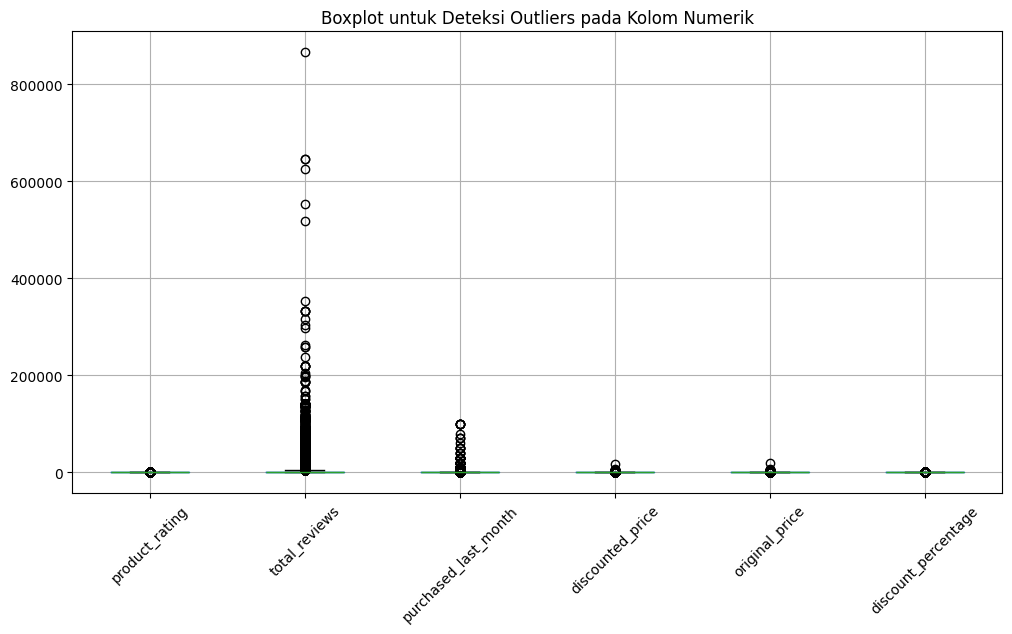

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    outlier_summary[col] = outlier_count

    print(f"{col}: {outlier_count} outlier(s)")

# Opsional: Visualisasi boxplot untuk kolom numerik
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot untuk Deteksi Outliers pada Kolom Numerik")
plt.xticks(rotation=45)
plt.show()

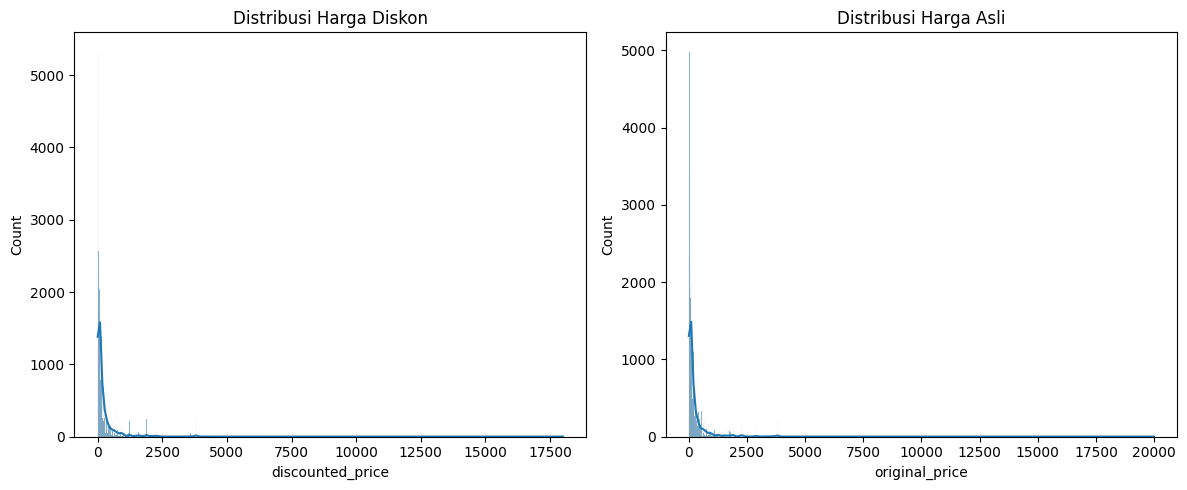

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['discounted_price'], kde=True, ax=axes[0])
axes[0].set_title("Distribusi Harga Diskon")

sns.histplot(df['original_price'], kde=True, ax=axes[1])
axes[1].set_title("Distribusi Harga Asli")

plt.tight_layout()
plt.show()


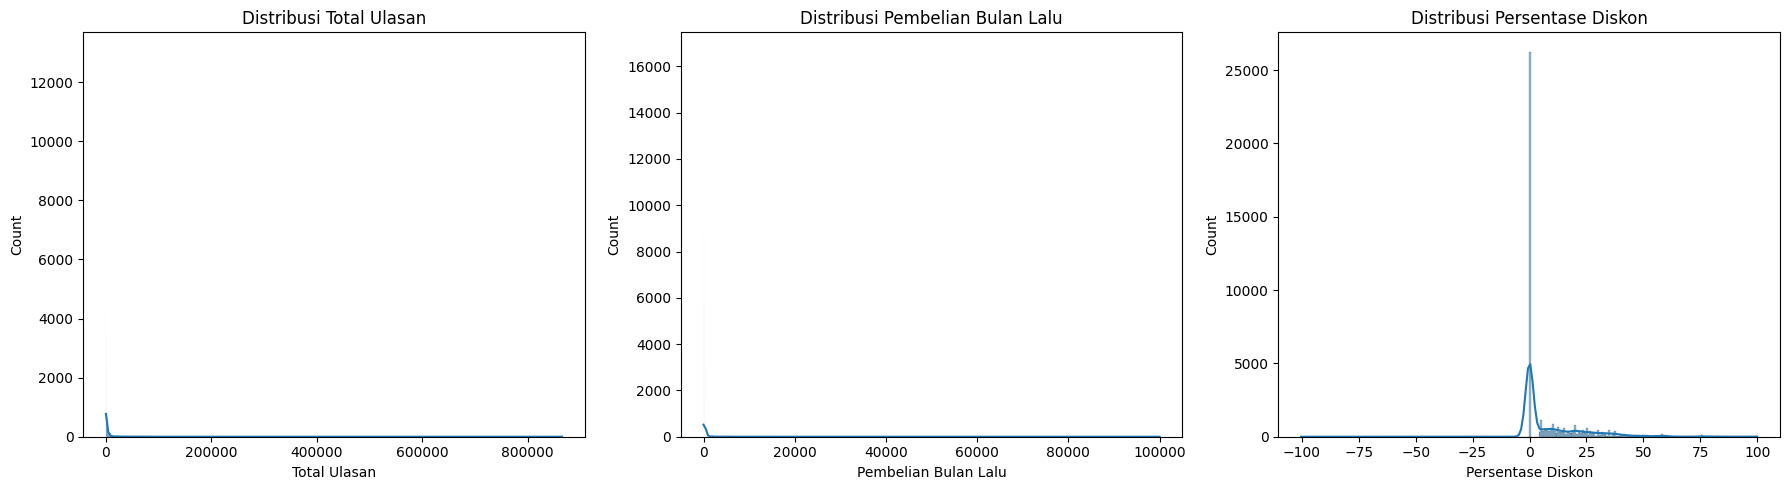

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['total_reviews'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Total Ulasan')
axes[0].set_xlabel('Total Ulasan')

sns.histplot(df['purchased_last_month'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Pembelian Bulan Lalu')
axes[1].set_xlabel('Pembelian Bulan Lalu')

sns.histplot(df['discount_percentage'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Persentase Diskon')
axes[2].set_xlabel('Persentase Diskon')

plt.tight_layout()
plt.show()

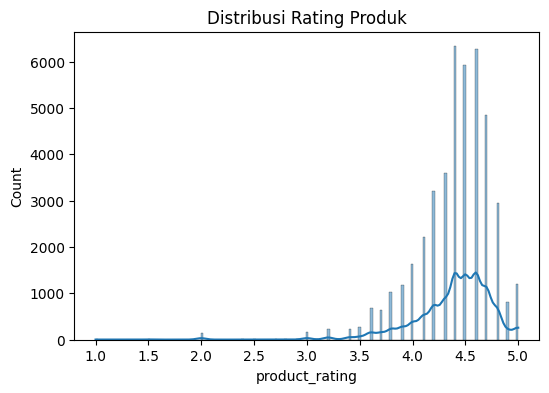

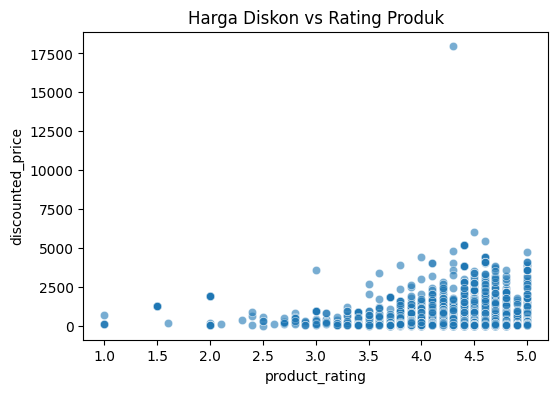

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['product_rating'], kde=True)
plt.title("Distribusi Rating Produk")
plt.show()



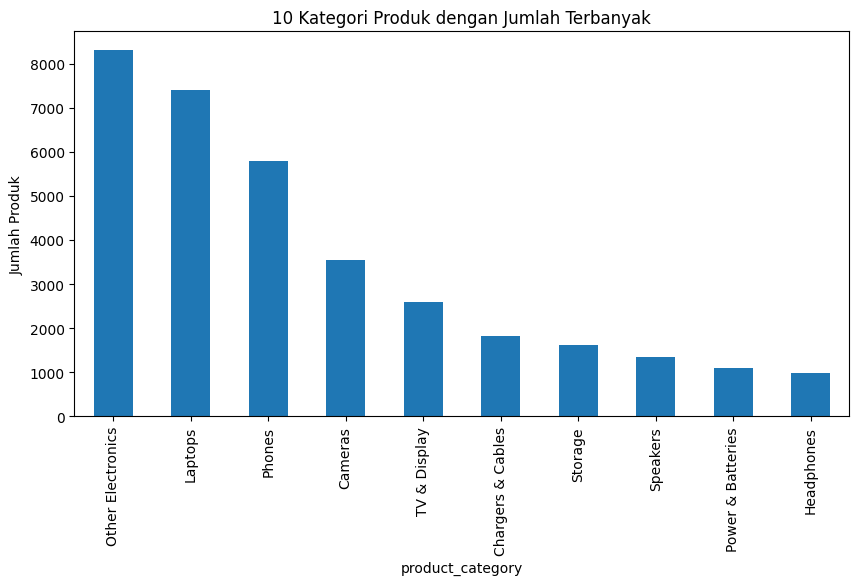

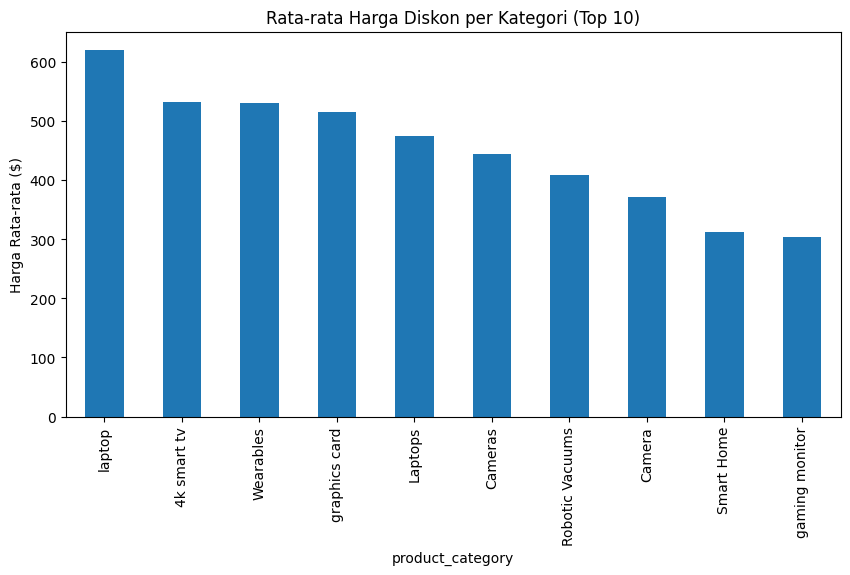

In [ ]:
plt.figure(figsize=(10,5))
df['product_category'].value_counts().head(10).plot(kind='bar')
plt.title("10 Kategori Produk dengan Jumlah Terbanyak")
plt.ylabel("Jumlah Produk")
plt.show()

# Rata-rata harga per kategori
avg_price_per_cat = df.groupby('product_category')['discounted_price'].mean().sort_values(ascending=False).head(10)
avg_price_per_cat.plot(kind='bar', figsize=(10,5))
plt.title("Rata-rata Harga Diskon per Kategori (Top 10)")
plt.ylabel("Harga Rata-rata ($)")
plt.show()

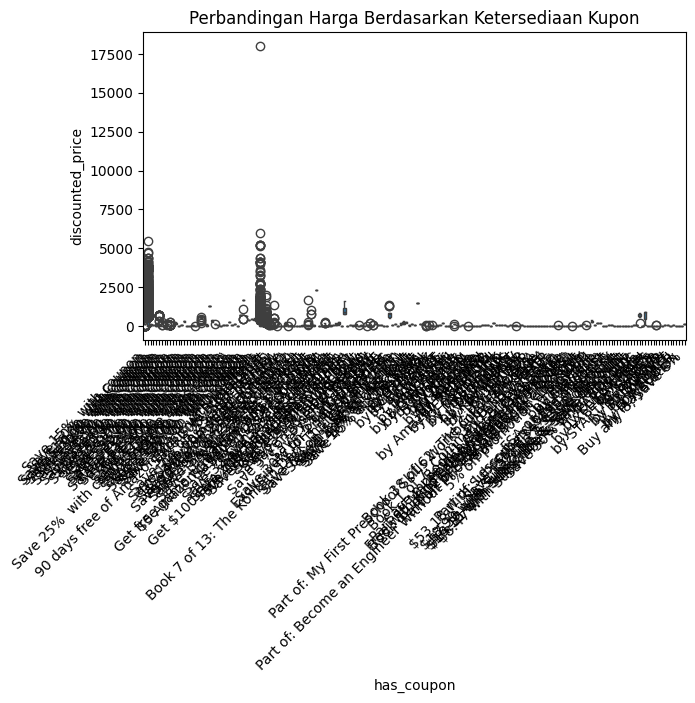

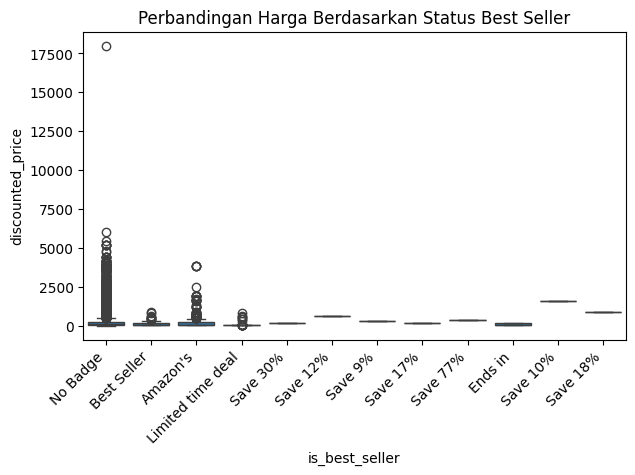

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x='has_coupon', y='discounted_price', data=df)
plt.title("Perbandingan Harga Berdasarkan Ketersediaan Kupon")
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x='is_best_seller', y='discounted_price', data=df)
plt.title("Perbandingan Harga Berdasarkan Status Best Seller")
plt.xticks(rotation=45, ha='right')
plt.show()

#Preprocessing dan Pembuatan Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.describe()

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,discount_percentage
count,43632.000000,43632.000000,43632.000000,43632.000000,43632.000000,43632.000000
mean,4.391378,3127.545861,510.509488,235.151274,255.694495,8.938735
std,0.374964,13800.610008,2057.260339,466.058400,499.274877,14.608811
min,1.000000,1.000000,0.000000,0.000000,2.160000,-100.330000
25%,4.200000,77.000000,100.000000,29.990000,36.990000,0.000000
50%,4.500000,348.000000,200.000000,85.990000,93.990000,0.000000
75%,4.600000,1800.000000,300.000000,219.000000,229.990000,14.580000
max,5.000000,865598.000000,100000.000000,17997.990000,19999.990000,100.000000


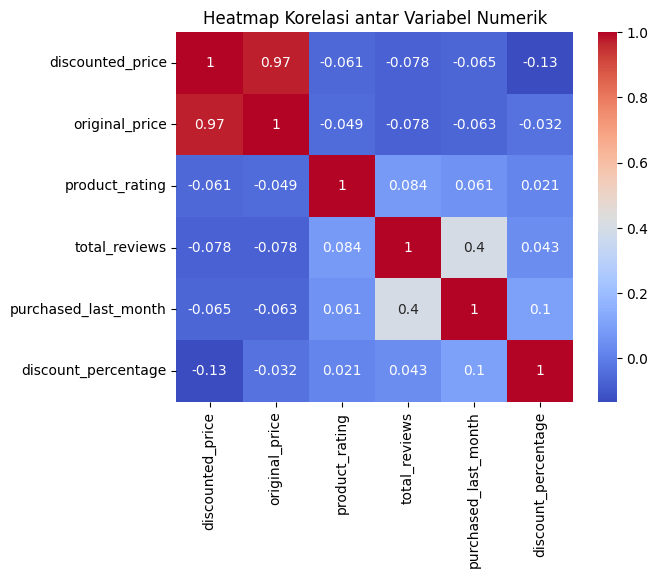

In [ ]:
# Korelasi numerik
corr = df[['discounted_price','original_price','product_rating','total_reviews','purchased_last_month','discount_percentage']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi antar Variabel Numerik")
plt.show()

## Eksplorasi Fitur Interaksi (Interaction Features)

Membuat fitur baru dengan menggabungkan fitur numerik yang sudah ada (misalnya, mengalikan atau membagi dua fitur) dan kemudian menghitung korelasinya dengan 'discounted_price'.


In [ ]:
interaction_features = []

# List of numerical features to create interaction terms from
base_numeric_features = ['original_price', 'product_rating', 'total_reviews', 'purchased_last_month']

# Create interaction features by multiplying pairs of base numeric features
for i in range(len(base_numeric_features)):
    for j in range(i + 1, len(base_numeric_features)):
        feature1 = base_numeric_features[i]
        feature2 = base_numeric_features[j]
        new_feature_name = f'{feature1}_x_{feature2}'
        df[new_feature_name] = df[feature1] * df[feature2]
        interaction_features.append(new_feature_name)

# Calculate correlation of each interaction feature with 'discounted_price'
correlation_with_target = {}
for feature in interaction_features:
    correlation_with_target[feature] = df[feature].corr(df['discounted_price'])

# Display the correlation values
print("Korelasi Fitur Interaksi dengan 'discounted_price':")
for feature, corr_value in correlation_with_target.items():
    print(f"{feature}: {corr_value:.4f}")

Korelasi Fitur Interaksi dengan 'discounted_price':
original_price_x_product_rating: 0.9551
original_price_x_total_reviews: 0.0302
original_price_x_purchased_last_month: 0.3734
product_rating_x_total_reviews: -0.0771
product_rating_x_purchased_last_month: -0.0634
total_reviews_x_purchased_last_month: -0.0107


### Analisis Korelasi Non-Linear dengan Mutual Information Score untuk Fitur Kategorikal



Categorical features identified: ['is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability', 'delivery_date', 'sustainability_tags', 'product_category']

Mutual Information Scores between Categorical Features and Discounted Price:


,Feature,Mutual_Information_Score
6,product_category,1.413756
4,delivery_date,1.191317
2,has_coupon,0.312321
3,buy_box_availability,0.285613
5,sustainability_tags,0.238675
1,is_sponsored,0.225066
0,is_best_seller,0.095680


/tmp/ipython-input-90562869.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual_Information_Score', y='Feature', data=mi_df, palette='viridis')


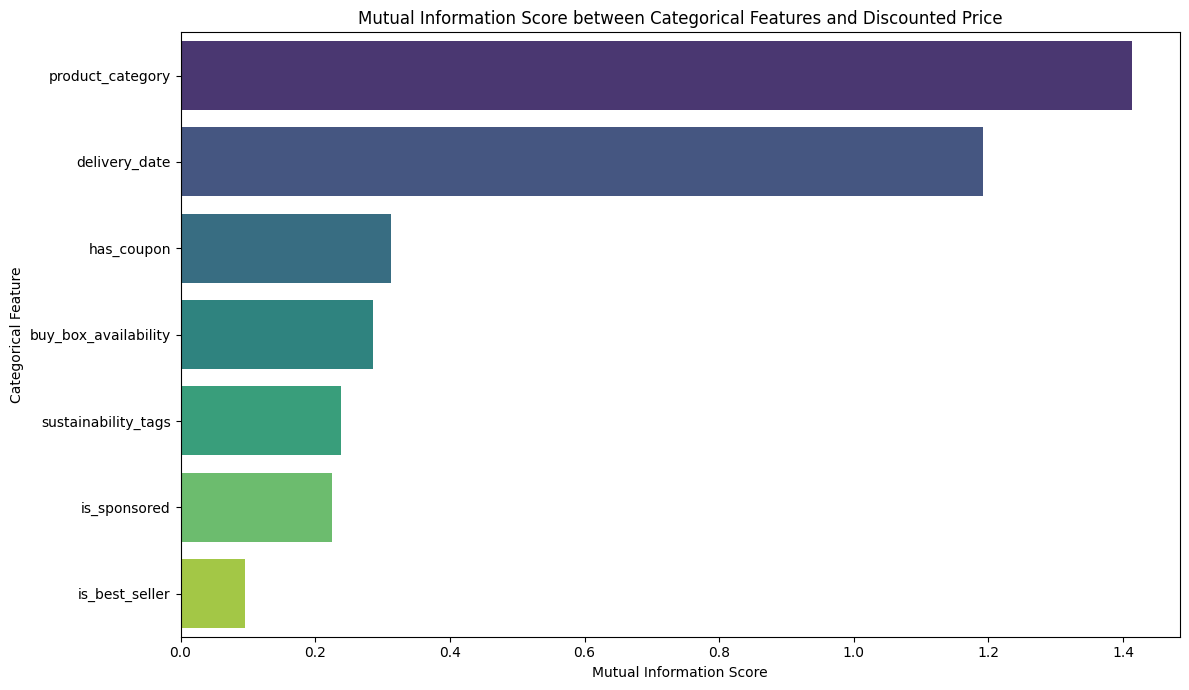

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Identify categorical features (excluding 'product_title', 'product_image_url', 'product_page_url', 'data_collected_at')
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Remove columns that are unique identifiers or dates and thus not suitable for MI calculation as categorical features
if 'product_title' in categorical_features: categorical_features.remove('product_title')
if 'product_image_url' in categorical_features: categorical_features.remove('product_image_url')
if 'product_page_url' in categorical_features: categorical_features.remove('product_page_url')
if 'data_collected_at' in categorical_features: categorical_features.remove('data_collected_at')

print(f"Categorical features identified: {categorical_features}")

# Prepare target variable
y_mi = df['discounted_price']

# Calculate Mutual Information for each categorical feature
mi_scores = {}
for feature in categorical_features:
    # Convert categorical feature to numerical labels for mutual_info_regression
    # Use .astype('category').cat.codes to handle cases where there might be NaNs or non-standard objects
    X_mi = df[feature].astype('category').cat.codes.values.reshape(-1, 1)

    # mutual_info_regression expects 2D array for X
    score = mutual_info_regression(X_mi, y_mi, random_state=42)[0]
    mi_scores[feature] = score

# Create a DataFrame for MI scores
mi_df = pd.DataFrame(mi_scores.items(), columns=['Feature', 'Mutual_Information_Score'])
mi_df = mi_df.sort_values(by='Mutual_Information_Score', ascending=False)

print("\nMutual Information Scores between Categorical Features and Discounted Price:")
display(mi_df)

# Visualize Mutual Information Scores
plt.figure(figsize=(12, 7))
sns.barplot(x='Mutual_Information_Score', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information Score between Categorical Features and Discounted Price')
plt.xlabel('Mutual Information Score')
plt.ylabel('Categorical Feature')
plt.tight_layout()
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Split the processed data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

print(f"Ukuran data pelatihan X : {X_train_xgb.shape}")
print(f"Ukuran data pengujian X : {X_test_xgb.shape}")
print(f"Ukuran data pelatihan y : {y_train_xgb.shape}")
print(f"Ukuran data pengujian y : {y_test_xgb.shape}")

Ukuran data pelatihan X : (34905, 437)
Ukuran data pengujian X : (8727, 437)
Ukuran data pelatihan y : (34905,)
Ukuran data pengujian y : (8727,)


In [ ]:
# Initialize and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', # For regression tasks
    n_estimators=200,             # Number of boosting rounds
    learning_rate=0.1,            # Step size shrinkage to prevent overfitting
    max_depth=5,                  # Maximum depth of a tree
    subsample=0.8,                # Subsample ratio of the training instance
    colsample_bytree=0.8,         # Subsample ratio of columns when constructing each tree
    random_state=42,              # Random seed for reproducibility
    n_jobs=-1                     # Use all available cores
)
xgb_model.fit(X_train_xgb, y_train_xgb)

print("Model XGBoost berhasil dilatih.")

Model XGBoost berhasil dilatih.


In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)
mae_xgb =  mean_absolute_error(y_test_xgb, y_pred_xgb)

print(f"XGBoost Regression Performance :\nRMSE: {rmse_xgb:.2f}\nR2 Score: {r2_xgb:.3f}\nMAE: {mae_xgb}")

XGBoost Regression Performance :
RMSE: 144.78
R2 Score: 0.916
MAE: 11.60350756701044


Preview perbandingan harga diskon aktual dan prediksi (XGBoost):


,Actual_Discounted_Price,Predicted_Discounted_Price
29172,13.99,14.044828
1864,179.99,171.485550
22001,157.02,171.474289
40149,29.99,26.784327
10612,144.99,168.103409


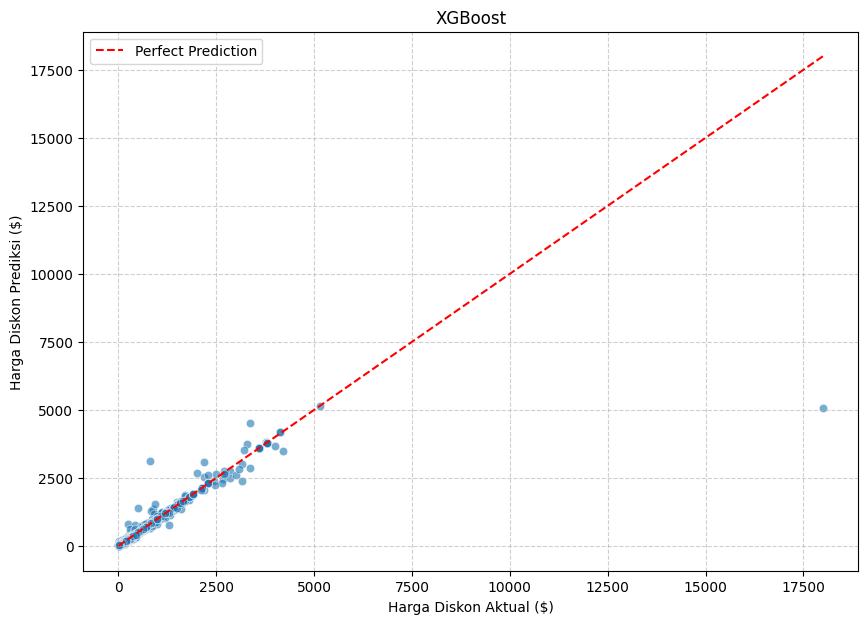

In [ ]:
# Create a DataFrame for actual vs. predicted values
xgb_predictions_df = pd.DataFrame({
    'Actual_Discounted_Price': y_test_xgb,
    'Predicted_Discounted_Price': y_pred_xgb
})

print("Preview perbandingan harga diskon aktual dan prediksi (XGBoost):")
display(xgb_predictions_df.head())

# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Actual_Discounted_Price',
    y='Predicted_Discounted_Price',
    data=xgb_predictions_df,
    alpha=0.6
)

# Plot a diagonal line for perfect predictions
max_val_xgb = max(xgb_predictions_df['Actual_Discounted_Price'].max(), xgb_predictions_df['Predicted_Discounted_Price'].max())
plt.plot([0, max_val_xgb], [0, max_val_xgb], color='red', linestyle='--', label='Perfect Prediction')

plt.title('XGBoost')
plt.xlabel('Harga Diskon Aktual ($)')
plt.ylabel('Harga Diskon Prediksi ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Random Forest

In [ ]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


numerical_features_specific_robust = [
    'original_price',
    'original_price_x_product_rating' # Fitur interaksi yang telah dibuat sebelumnya
]

categorical_features_specific_robust = [
    'product_category',
    'delivery_date'
]

# --- 2. Mendefinisikan Variabel Target ---
y = df['discounted_price']

# --- 3. One-Hot Encoding Ulang Fitur Kategorikal yang Dipilih (pada seluruh dataset) ---
ohe_robust = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical_encoded_robust_array = ohe_robust.fit_transform(df[categorical_features_specific_robust])
categorical_encoded_feature_names_robust = ohe_robust.get_feature_names_out(categorical_features_specific_robust)
X_categorical_encoded_robust = pd.DataFrame(X_categorical_encoded_robust_array, columns=categorical_encoded_feature_names_robust, index=df.index)

print("Shape of one-hot encoded and specific categorical features:", X_categorical_encoded_robust.shape)
print("First 5 rows of one-hot encoded and specific categorical features:")
print(X_categorical_encoded_robust.head())

# --- 4. Memisahkan data numerik dan kategorikal yang sudah di-encode sebelum scaling ---
X_numerical_raw = df[numerical_features_specific_robust]

# --- 5. Membagi data menjadi training dan testing set (termasuk fitur numerik mentah dan kategorikal yang sudah di-encode) ---
X_train_numerical_raw, X_test_numerical_raw, \
X_train_categorical_encoded, X_test_categorical_encoded, \
y_train_robust, y_test_robust = train_test_split(
    X_numerical_raw, X_categorical_encoded_robust, y, test_size=0.2, random_state=42
)

# --- 6. Penskalaan Ulang Fitur Numerik yang Dipilih menggunakan RobustScaler (SETELAH SPLIT) ---
scaler_robust = RobustScaler()

X_train_numerical_scaled_robust = pd.DataFrame(
    scaler_robust.fit_transform(X_train_numerical_raw),
    columns=numerical_features_specific_robust,
    index=X_train_numerical_raw.index
)
X_test_numerical_scaled_robust = pd.DataFrame(
    scaler_robust.transform(X_test_numerical_raw),
    columns=numerical_features_specific_robust,
    index=X_test_numerical_raw.index
)

print("\nShape of robust-scaled training numerical features:", X_train_numerical_scaled_robust.shape)
print("First 5 rows of robust-scaled training numerical features:")
print(X_train_numerical_scaled_robust.head())

# --- 7. Menggabungkan Fitur yang Telah Diproses dan Spesifik untuk training dan testing set ---
X_train_robust = pd.concat([X_train_numerical_scaled_robust, X_train_categorical_encoded], axis=1)
X_test_robust = pd.concat([X_test_numerical_scaled_robust, X_test_categorical_encoded], axis=1)

print("\nShape of processed and specific training feature DataFrame (X_train_robust):", X_train_robust.shape)
print("First 5 rows of processed and specific training feature DataFrame (X_train_robust):")
print(X_train_robust.head())

print(f"\nTarget variable (y) defined with shape: {y.shape}")

Shape of one-hot encoded and specific categorical features: (43632, 198)
First 5 rows of one-hot encoded and specific categorical features:
   product_category_4k smart tv  product_category_Android Tablet  \
0                           0.0                              0.0   
1                           0.0                              0.0   
2                           0.0                              0.0   
3                           0.0                              0.0   
4                           0.0                              0.0   

   product_category_Arduino  product_category_Camera  \
0                       0.0                      0.0   
1                       0.0                      0.0   
2                       0.0                      0.0   
3                       0.0                      0.0   
4                       0.0                      0.0   

   product_category_Cameras  product_category_Chargers & Cables  \
0                       0.0                    

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data sudah dibagi dan diproses dalam cell sebelumnya
print(f"Ukuran data pelatihan X (RobustScaler): {X_train_robust.shape}")
print(f"Ukuran data pengujian X (RobustScaler): {X_test_robust.shape}")
print(f"Ukuran data pelatihan y (RobustScaler): {y_train_robust.shape}")
print(f"Ukuran data pengujian y (RobustScaler): {y_test_robust.shape}")

Ukuran data pelatihan X (RobustScaler): (34905, 200)
Ukuran data pengujian X (RobustScaler): (8727, 200)
Ukuran data pelatihan y (RobustScaler): (34905,)
Ukuran data pengujian y (RobustScaler): (8727,)


In [ ]:
# Initialize and train the Random Forest Regressor model with RobustScaler features
rf_robust = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_robust.fit(X_train_robust, y_train_robust)

print("Model Random Forest dengan RobustScaler dan fitur spesifik berhasil dilatih.")

Model Random Forest dengan RobustScaler dan fitur spesifik berhasil dilatih.


In [ ]:
# Make predictions on the test set with RobustScaler features
y_pred_rf_robust = rf_robust.predict(X_test_robust)

# Evaluate the model's performance
mse_rf_robust = mean_squared_error(y_test_robust, y_pred_rf_robust)
rmse_rf_robust = np.sqrt(mse_rf_robust)
r2_rf_robust = r2_score(y_test_robust, y_pred_rf_robust)
mae = mean_absolute_error(y_test_robust, y_pred_rf_robust)

print(f"Random Forest Regression Performance :\nRMSE: {rmse_rf_robust:.2f}\nR2 Score: {r2_rf_robust:.3f}\nMAE: {mae}")

Random Forest Regression Performance :
RMSE: 139.19
R2 Score: 0.922
MAE: 7.671029107163569


Preview perbandingan harga diskon aktual dan prediksi (RobustScaler):


,Actual_Discounted_Price,Predicted_Discounted_Price
29172,13.99,13.990000
1864,179.99,179.990000
22001,157.02,156.960099
40149,29.99,29.990000
10612,144.99,144.990000


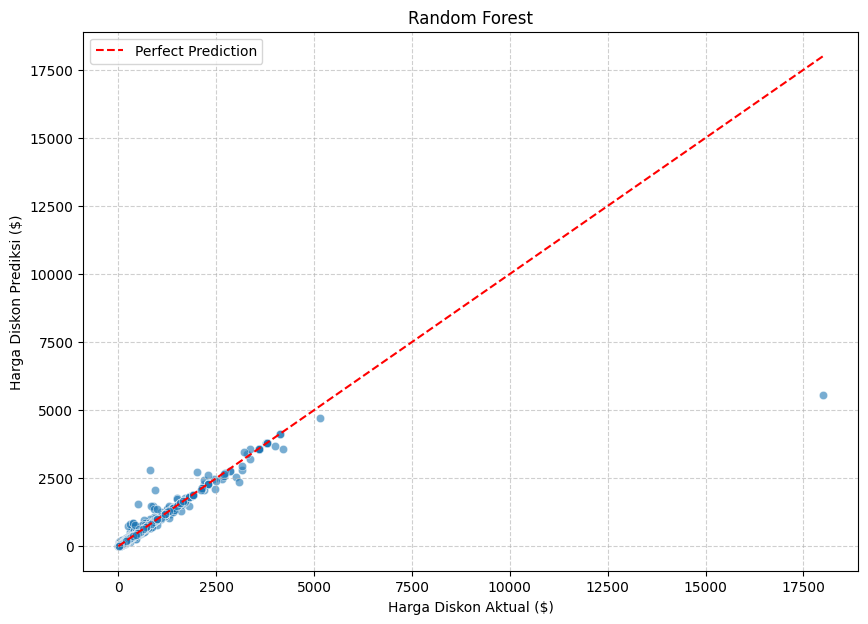

In [ ]:
# Create a DataFrame for actual vs. predicted values
robust_predictions_df = pd.DataFrame({
    'Actual_Discounted_Price': y_test_robust,
    'Predicted_Discounted_Price': y_pred_rf_robust
})

print("Preview perbandingan harga diskon aktual dan prediksi (RobustScaler):")
display(robust_predictions_df.head())

# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Actual_Discounted_Price',
    y='Predicted_Discounted_Price',
    data=robust_predictions_df,
    alpha=0.6
)

# Plot a diagonal line for perfect predictions
max_val_robust = max(robust_predictions_df['Actual_Discounted_Price'].max(), robust_predictions_df['Predicted_Discounted_Price'].max())
plt.plot([0, max_val_robust], [0, max_val_robust], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Random Forest')
plt.xlabel('Harga Diskon Aktual ($)')
plt.ylabel('Harga Diskon Prediksi ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()